## MACHINE LEARNING ANÁLISE DE RISCO DE CRÉDITO DO CLIENTE

## Modelo de dados (Classificação de crédito)
#### O conjunto de dados original contém 1000 entradas com 20 atributos categoriais/simbólicos. Nesse conjunto de dados, cada entrada representa uma pessoa que recebe um crédito de um banco. Cada pessoa é classificada como risco de crédito bom ou ruim de acordo com o conjunto de atributos.

### ATRIBUTOS DE CADA COLUNA
Idade (numérico)\
Sexo (texto: masculino, feminino)\
Emprego (numérico: 0 - não qualificado e não residente, 1 - não qualificado e residente, 2 - qualificado, 3 - altamente qualificado)\
Habitação (texto: próprio, alugado ou gratuito)\
Contas de poupança (texto - pouco, moderado, bastante rico, rico)\
Conta corrente (numérica, em DM - Deutsch Mark)\
Valor do crédito (numérico, em DM)\
Duração (numérico, em mês)\
Finalidade (texto: carro, móveis/equipamentos, rádio/TV, eletrodomésticos, reparos, educação, negócios, férias/outros)

In [1]:
# Para Manipulação de dados
import pandas as pd
import numpy as np

# Para Gráficos
import seaborn as sns
import matplotlib.pyplot as plt
import sweetviz as sv

# Para Modelagem 
from sklearn.model_selection import train_test_split, GridSearchCV, ParameterGrid, KFold
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score

## 1) Manipulação e tratamento dos dados 

In [2]:
df = pd.read_csv("german_credit_data.csv", index_col=0)
df.head(10)

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,49,male,1,own,little,NaN,2096,12,education,good
3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,53,male,2,free,little,little,4870,24,car,bad
5,35,male,1,free,NaN,NaN,9055,36,education,good
6,53,male,2,own,quite rich,NaN,2835,24,furniture/equipment,good
7,35,male,3,rent,little,moderate,6948,36,car,good
8,61,male,1,own,rich,NaN,3059,12,radio/TV,good
9,28,male,3,own,little,moderate,5234,30,car,bad


In [3]:
# RENOMEANDO COLUNAS
df = df.rename(columns={"Credit amount": "Credit_amount","Saving accounts":"Saving_accounts","Checking account":"Checking_account"})

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               1000 non-null   int64 
 1   Sex               1000 non-null   object
 2   Job               1000 non-null   int64 
 3   Housing           1000 non-null   object
 4   Saving_accounts   817 non-null    object
 5   Checking_account  606 non-null    object
 6   Credit_amount     1000 non-null   int64 
 7   Duration          1000 non-null   int64 
 8   Purpose           1000 non-null   object
 9   Risk              1000 non-null   object
dtypes: int64(4), object(6)
memory usage: 85.9+ KB


In [5]:
df.isna().sum()

Age                   0
Sex                   0
Job                   0
Housing               0
Saving_accounts     183
Checking_account    394
Credit_amount         0
Duration              0
Purpose               0
Risk                  0
dtype: int64

In [6]:
df["Saving_accounts"] = df["Saving_accounts"].fillna(df["Saving_accounts"].mode().values[0])
df["Checking_account"] = df["Checking_account"].fillna(df["Checking_account"].mode().values[0])

In [7]:
df.isna().sum()

Age                 0
Sex                 0
Job                 0
Housing             0
Saving_accounts     0
Checking_account    0
Credit_amount       0
Duration            0
Purpose             0
Risk                0
dtype: int64

In [8]:
df.describe()

,Age,Job,Credit_amount,Duration
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,35.546000,1.904000,3271.258000,20.903000
std,11.375469,0.653614,2822.736876,12.058814
min,19.000000,0.000000,250.000000,4.000000
25%,27.000000,2.000000,1365.500000,12.000000
50%,33.000000,2.000000,2319.500000,18.000000
75%,42.000000,2.000000,3972.250000,24.000000
max,75.000000,3.000000,18424.000000,72.000000


### Análise exploratória das variáveis categórica

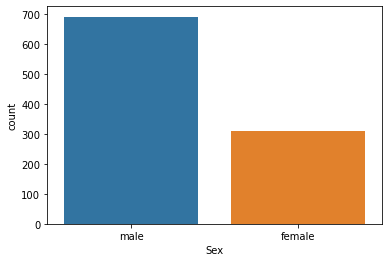

In [9]:
df.Sex.value_counts()
grafico = sns.countplot(x="Sex", data=df)

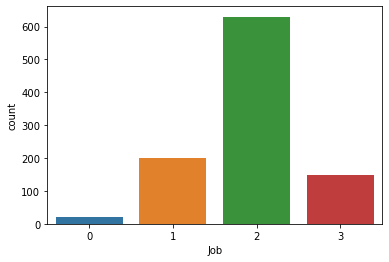

In [10]:
df.Job.value_counts()
grafico = sns.countplot(x="Job", data=df)

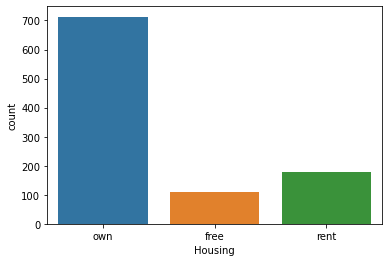

In [11]:
df.Housing.value_counts()
grafico = sns.countplot(x="Housing", data=df)

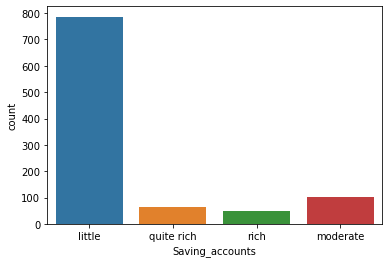

In [12]:
df.Saving_accounts.value_counts()
grafico = sns.countplot(x="Saving_accounts", data=df)

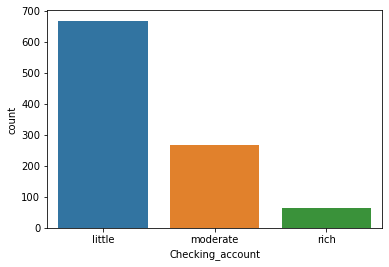

In [13]:
df.Checking_account.value_counts()
grafico = sns.countplot(x="Checking_account", data=df)

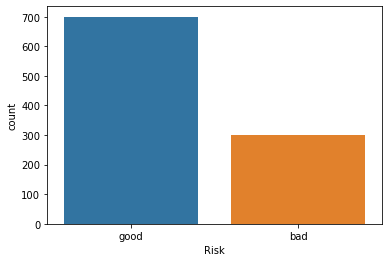

In [14]:
df.Risk.value_counts()
grafico = sns.countplot(x="Risk", data=df)

<AxesSubplot:xlabel='Credit_amount'>

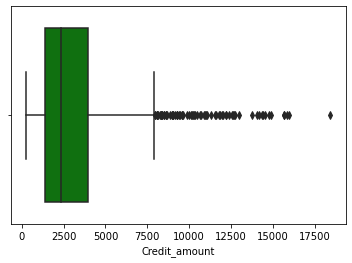

In [15]:
sns.boxplot(x="Credit_amount", palette=["g"], data=df)

In [16]:
df.Credit_amount.value_counts()

1258    3
1262    3
1393    3
1478    3
1275    3
       ..
759     1
760     1
763     1
2812    1
6143    1
Name: Credit_amount, Length: 921, dtype: int64

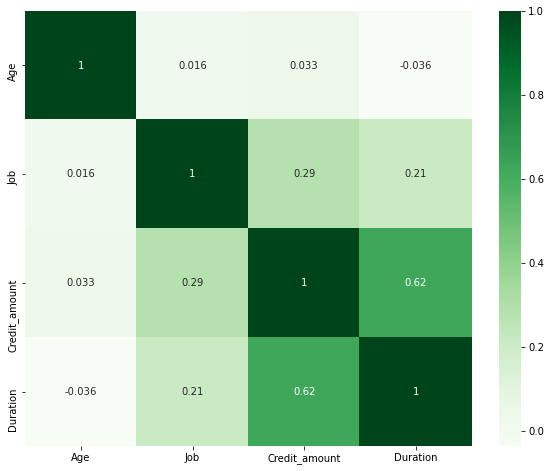

In [17]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='Greens')
plt.show()

In [18]:
# CRIAR COLUNA TARGET

df["Target"] = df["Risk"].replace(["good", "bad"],[0,1])
df.head()

,Age,Sex,Job,Housing,Saving_accounts,Checking_account,Credit_amount,Duration,Purpose,Risk,Target
0,67,male,2,own,little,little,1169,6,radio/TV,good,0
1,22,female,2,own,little,moderate,5951,48,radio/TV,bad,1
2,49,male,1,own,little,little,2096,12,education,good,0
3,45,male,2,free,little,little,7882,42,furniture/equipment,good,0
4,53,male,2,free,little,little,4870,24,car,bad,1


In [19]:
# DELETAR A COLUNA RISK (DROP)

df.drop("Risk", axis=1, inplace=True)
df.head()

,Age,Sex,Job,Housing,Saving_accounts,Checking_account,Credit_amount,Duration,Purpose,Target
0,67,male,2,own,little,little,1169,6,radio/TV,0
1,22,female,2,own,little,moderate,5951,48,radio/TV,1
2,49,male,1,own,little,little,2096,12,education,0
3,45,male,2,free,little,little,7882,42,furniture/equipment,0
4,53,male,2,free,little,little,4870,24,car,1


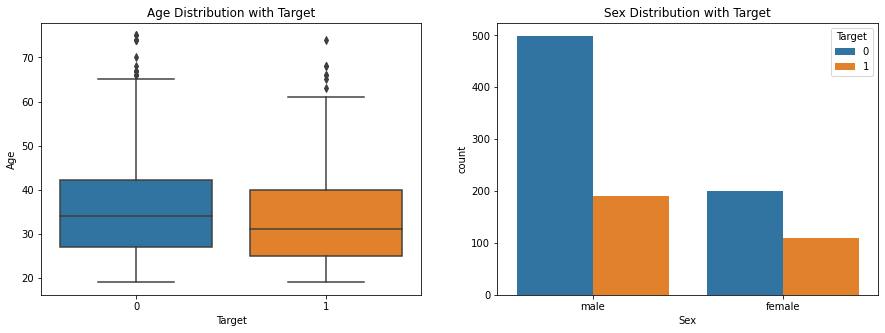

In [20]:
fig, ax = plt.subplots(1,2,figsize=(15,5))
sns.boxplot(data=df, x='Target', y='Age', ax=ax[0]).set_title("Age Distribution with Target");
sns.countplot(data=df, x="Sex", hue="Target", ax=ax[1]).set_title("Sex Distribution with Target");

## Codificando as variáveis

In [21]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
df['Sex'] = label_encoder.fit_transform(df['Sex'])
df['Checking_account'] = label_encoder.fit_transform(df['Checking_account'])
df.head(10)

,Age,Sex,Job,Housing,Saving_accounts,Checking_account,Credit_amount,Duration,Purpose,Target
0,67,1,2,own,little,0,1169,6,radio/TV,0
1,22,0,2,own,little,1,5951,48,radio/TV,1
2,49,1,1,own,little,0,2096,12,education,0
3,45,1,2,free,little,0,7882,42,furniture/equipment,0
4,53,1,2,free,little,0,4870,24,car,1
5,35,1,1,free,little,0,9055,36,education,0
6,53,1,2,own,quite rich,0,2835,24,furniture/equipment,0
7,35,1,3,rent,little,1,6948,36,car,0
8,61,1,1,own,rich,0,3059,12,radio/TV,0
9,28,1,3,own,little,1,5234,30,car,1


In [22]:
df = pd.get_dummies (data = df, columns=['Job', 'Housing', 'Saving_accounts', 'Purpose'])
df.head(10)

,Age,Sex,Checking_account,Credit_amount,Duration,Target,Job_0,Job_1,Job_2,Job_3,...,Saving_accounts_quite rich,Saving_accounts_rich,Purpose_business,Purpose_car,Purpose_domestic appliances,Purpose_education,Purpose_furniture/equipment,Purpose_radio/TV,Purpose_repairs,Purpose_vacation/others
0,67,1,0,1169,6,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
1,22,0,1,5951,48,1,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
2,49,1,0,2096,12,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
3,45,1,0,7882,42,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
4,53,1,0,4870,24,1,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
5,35,1,0,9055,36,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
6,53,1,0,2835,24,0,0,0,1,0,...,1,0,0,0,0,0,1,0,0,0
7,35,1,1,6948,36,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
8,61,1,0,3059,12,0,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0
9,28,1,1,5234,30,1,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0


In [23]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df[['Age', 'Credit_amount', 'Duration']]=scaler.fit_transform(df[['Age', 'Credit_amount', 'Duration']])
df.head(10)

,Age,Sex,Checking_account,Credit_amount,Duration,Target,Job_0,Job_1,Job_2,Job_3,...,Saving_accounts_quite rich,Saving_accounts_rich,Purpose_business,Purpose_car,Purpose_domestic appliances,Purpose_education,Purpose_furniture/equipment,Purpose_radio/TV,Purpose_repairs,Purpose_vacation/others
0,0.857143,1,0,0.050567,0.029412,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
1,0.053571,0,1,0.313690,0.647059,1,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
2,0.535714,1,0,0.101574,0.117647,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
3,0.464286,1,0,0.419941,0.558824,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
4,0.607143,1,0,0.254209,0.294118,1,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
5,0.285714,1,0,0.484483,0.470588,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
6,0.607143,1,0,0.142236,0.294118,0,0,0,1,0,...,1,0,0,0,0,0,1,0,0,0
7,0.285714,1,1,0.368548,0.470588,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
8,0.750000,1,0,0.154561,0.117647,0,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0
9,0.160714,1,1,0.274238,0.382353,1,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0


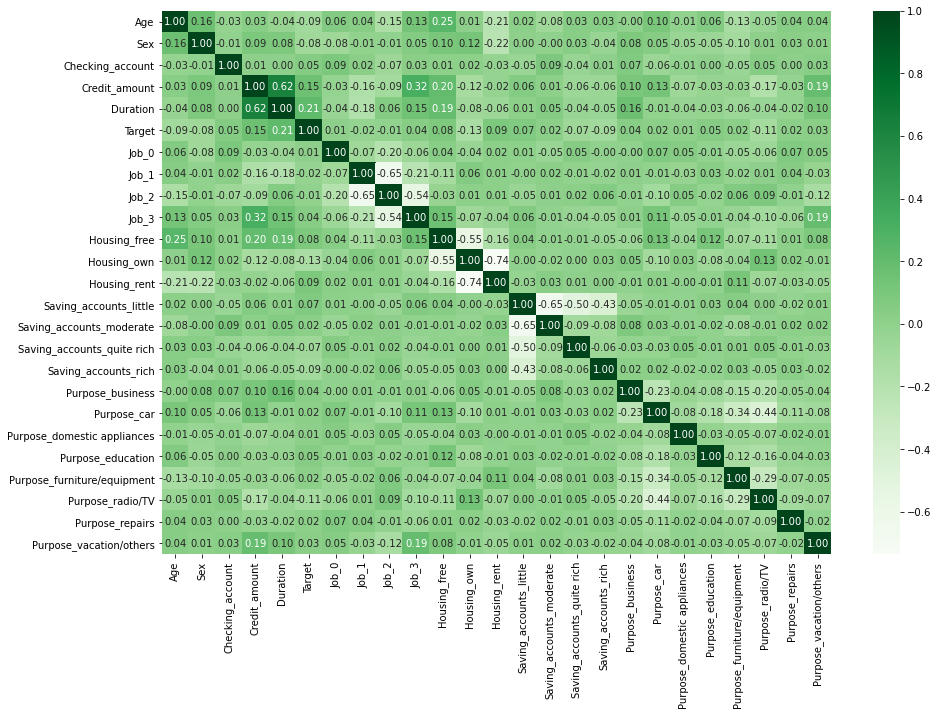

In [24]:
plt.figure(figsize=(15, 10))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap='Greens')
plt.show()

## Dividir dados em teste e treino

### Comparando os algoritimos de classificação

In [25]:
models_LGR = LogisticRegression()
models_LDA = LinearDiscriminantAnalysis()
models_KNN = KNeighborsClassifier(n_neighbors=10)
models_CART = DecisionTreeClassifier(max_depth = 4)
models_NB = GaussianNB()
models_RF = RandomForestClassifier(random_state=0)
models_SVM = SVC()

In [26]:
y = df['Target']
X = df.drop('Target', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [27]:
models_LGR.fit(X_train, y_train)
previsao = models_LGR.predict(X_test)   
print("Acurácia: {:.2f}%".format(accuracy_score(previsao, y_test)*100)) 
print("F1 Score: {:.2f}%".format(f1_score(previsao, y_test)*100))

Acurácia: 72.33%
F1 Score: 20.95%


In [28]:
models_LDA.fit(X_train, y_train)
previsao = models_LDA.predict(X_test)   
print("Acurácia: {:.2f}%".format(accuracy_score(previsao, y_test)*100))
print("F1 Score: {:.2f}%".format(f1_score(previsao, y_test)*100))

Acurácia: 72.00%
F1 Score: 23.64%


In [29]:
models_KNN.fit(X_train, y_train)
previsao = models_KNN.predict(X_test)   
print("Acurácia: {:.2f}%".format(accuracy_score(previsao, y_test)*100))
print("F1 Score: {:.2f}%".format(f1_score(previsao, y_test)*100))

Acurácia: 68.00%
F1 Score: 15.79%


In [30]:
models_CART.fit(X_train, y_train)
previsao = models_CART.predict(X_test)   
print("Acurácia: {:.2f}%".format(accuracy_score(previsao, y_test)*100))
print("F1 Score: {:.2f}%".format(f1_score(previsao, y_test)*100))

Acurácia: 67.67%
F1 Score: 18.49%


In [31]:
models_NB.fit(X_train, y_train)
previsao = models_NB.predict(X_test)   
print("Acurácia: {:.2f}%".format(accuracy_score(previsao, y_test)*100))
print("F1 Score: {:.2f}%".format(f1_score(previsao, y_test)*100))

Acurácia: 65.33%
F1 Score: 38.82%


In [32]:
models_RF.fit(X_train, y_train)
previsao = models_RF.predict(X_test)   
print("Acurácia: {:.2f}%".format(accuracy_score(previsao, y_test)*100))
print("F1 Score: {:.2f}%".format(f1_score(previsao, y_test)*100))

Acurácia: 72.00%
F1 Score: 27.59%


In [33]:
models_SVM.fit(X_train, y_train)
previsao = models_SVM.predict(X_test)   
print("Acurácia: {:.2f}%".format(accuracy_score(previsao, y_test)*100))
print("F1 Score: {:.2f}%".format(f1_score(previsao, y_test)*100))

Acurácia: 71.00%
F1 Score: 2.25%
